# Introduzione all'analisi di Immagini in Python


In Python ci sono molte librerie che possono essere utilizzate per la manipolazione di immagini.

Le librerie di base che useremo sono `NumPy`, `SciPy` e `Matplotlib`.  
- `matplotlib verrà principalmente utilizzata per mostrare le immagini. 
- `NumPy` servirà per analizzare come le immagini vengono rappresentate
- Infine, `SciPy` servirà per fare operazioni di manipolazione "complesse".  

Altre librerie avanzate che vedremo in seguito sono    `PIL` (Pillow), `OpenCV` e `scikit-learn`. 

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import affine_transform, zoom
from scipy import misc


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

Definiamo alcune funzioni di utilità che utilizzeremo nel corso del notebook

In [2]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off') 
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 

## Concetti fondamentali su immagini

Cominciamo con vedere come possiamo leggere immagini base usando matplotlib. 

(375, 500, 3) float32 <class 'numpy.ndarray'>


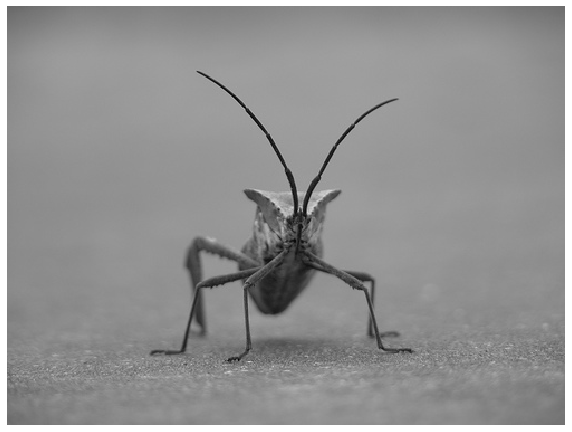

In [3]:
# legge l'immagine come un'array di pixel
image = mp_image.imread(os.path.join(img_src,'stinkbug.png'))
# un po' di sommari

img_info(image)

# visualizziamo l'immagine
img_show(image)

Vediamo com'è fatta l'immagine da vicino

In [4]:
print(image)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


L'immagine è in formato RGB  (tre canali: R, G e B). Notare che il tipo è `float32`: tutti i valori sono salati. 
Di fatto è possibile riportare il tutto a 24 bit trasformando l'immagine

(375, 500, 3) uint8 <class 'numpy.ndarray'>


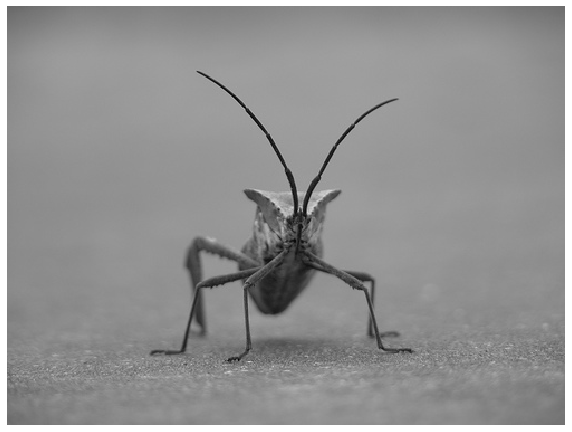

In [62]:
image1 = (image*255).astype("uint8")

img_info(image1)

img_show(image1) # display the image


Se esploriamo l'immagine vediamo questo

In [6]:
print(image1[0,0])

[104 104 104]


Cosa notate dell'immagine? E' in toni di grigio, poiché i tre colori sono identici. 
Quindi, se proviamo a visualizzare l'immagine usando un solo canale dovremmo ottenere la stessa rappresentazione

(375, 500) uint8 <class 'numpy.ndarray'>


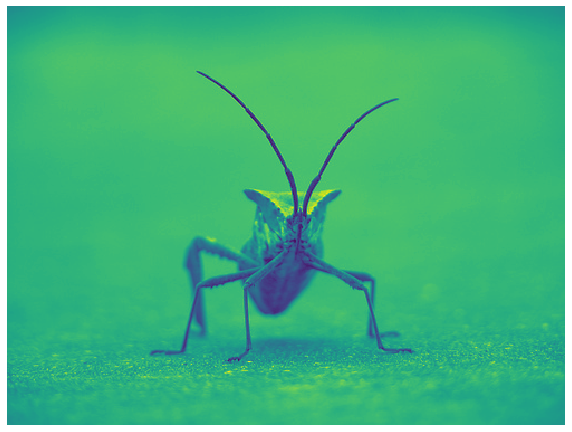

In [7]:
img_grey = image1[:,:,0]

img_info(img_grey) 


img_show(img_grey) # display the image


cos'è successo? Perché viene visualizzata in questo modo? 
Le matrici bidimensionali vengono interpretate in `Matplotlib` come a mappa di colori. La visualizzazione che abbiamo appena visto utilizza una mappa di default. 

Vediamo altre possibili mappe (una lista completa è disponibile [qui](https://matplotlib.org/tutorials/colors/colormaps.html) 


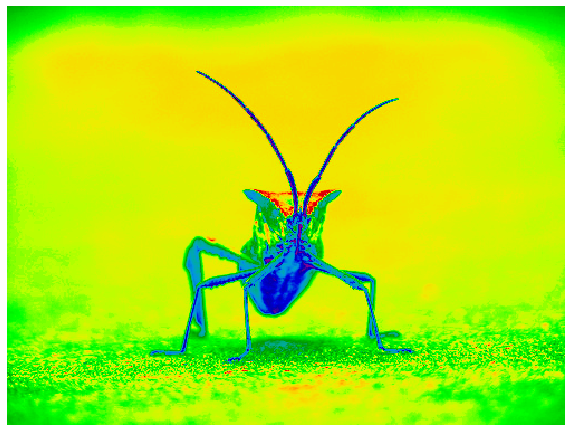

In [8]:
img_show(img_grey, cmap="nipy_spectral")


Vediamo un po' più in dettaglio: 


In [9]:
cmap = cm.get_cmap('Spectral')



print(cmap)


In [10]:
print(cmap(range(12)))

[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.62806613 0.01330258 0.26082276 1.        ]
 [0.63652441 0.02268358 0.26282199 1.        ]
 [0.6449827  0.03206459 0.26482122 1.        ]
 [0.65344098 0.0414456  0.26682045 1.        ]
 [0.66189927 0.05082661 0.26881968 1.        ]
 [0.67035755 0.06020761 0.27081892 1.        ]
 [0.67881584 0.06958862 0.27281815 1.        ]
 [0.68727413 0.07896963 0.27481738 1.        ]
 [0.69573241 0.08835063 0.27681661 1.        ]
 [0.7041907  0.09773164 0.27881584 1.        ]
 [0.71264898 0.10711265 0.28081507 1.        ]]


In [11]:

rgba = cmap(100)

print(rgba)



(0.9957708573625529, 0.8630526720492118, 0.5321799307958477, 1.0)


`rgba` rappresenta il valore della tavolozza corrispondente all'indice 100. è in formato RGB$\alpha$, ovvero un formato che oltre ai valori dei canali ha un valore aggiuntivo per la luminosità.  


Proviamo ora a plottare l'immagine con la paletta corretta, corredandola anche di una legenda per i colori


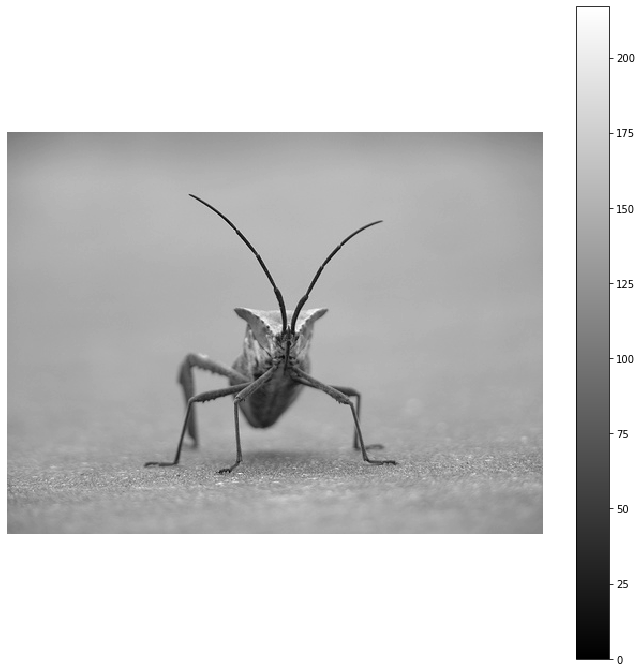

In [394]:
plt.figure(figsize=(12,12))
plt.imshow(img_grey, cmap="gray")
plt.colorbar()
plt.axis('off')
plt.show()


Proviamo a trasformare l'immagine in binaria. Trasformiamo in 0 tutti i valori al di sotto di una certa soglia, e in 1 quelli al di sopra. 

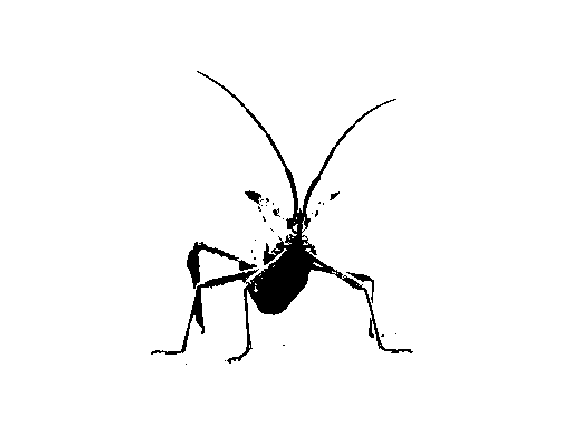

In [13]:
def binarize_image(image, threshold):
    return np.where(image <= threshold, 0, 255)


THRESHOLD = 80

img_bn = binarize_image(img_grey,THRESHOLD)


img_show(img_bn, cmap="gray")


È anche possibile ottenere la stessa rappresentazione in formato RGB, utilizzando tre canali: 

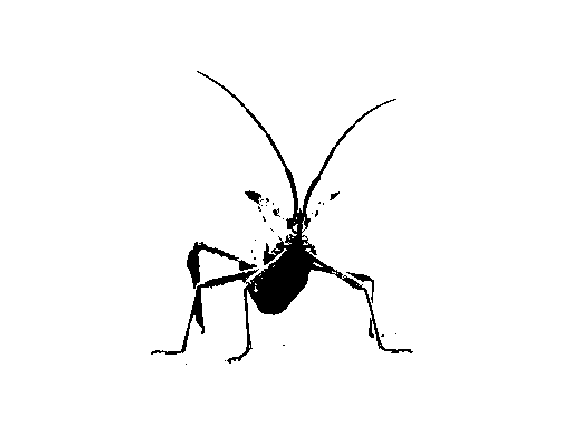

In [14]:
 img_bn_rgb= np.zeros((img_grey.shape[0],img_grey.shape[1],3))

# Where we set the RGB for each pixel
img_bn_rgb[img_grey>THRESHOLD] = [1,1,1]
img_bn_rgb[img_grey<THRESHOLD] = [0,0,0]

img_show(img_bn_rgb)


Vediamo adesso un po' più in dettaglio una immagine a colori. 

(1960, 1960, 3) uint8 <class 'numpy.ndarray'>


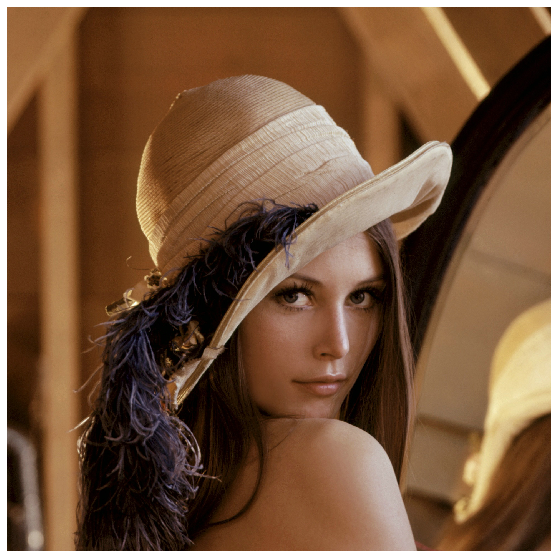

In [15]:

img = mp_image.imread(os.path.join(img_src,'lenna.jpg'))     
img_info(img) 

img_show(img)


Se andiamo ad analizzare il contenuto, osserviamo questo: 

In [16]:
print(img[0,0])

[156 104  57]


Possiamo normalizzare i valori e ottenere la stessa rappresentazione: 

(1960, 1960, 3) float64 <class 'numpy.ndarray'>


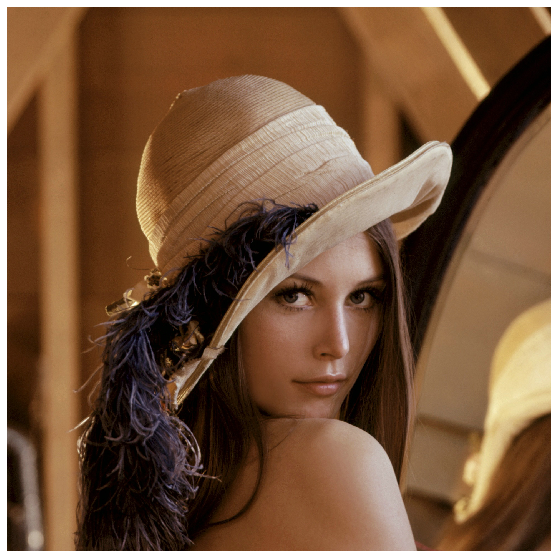

[0.61176471 0.40784314 0.22352941]


In [17]:
img_alt = (img/255.0).astype(float)
img_info(img_alt)

img_show(img_alt)


print(img_alt[0,0])

Trasformare un'immagine da RGB a scale di grigio è più complicato. Si tratta di mappare ogni colore a un valore di grigio. Ci sono vari modi per effettuare questa mappatura (su [wikpedia](https://en.wikipedia.org/wiki/Grayscale) ne sono indicati alcuni. Per esempio, se consideriamo l'associazione

$$
Y = 0.2989*R + 0.5870*G +  0.1140*B
$$

possiamo trasformare l'immagine in questo modo:

(1960, 1960) float64 <class 'numpy.ndarray'>


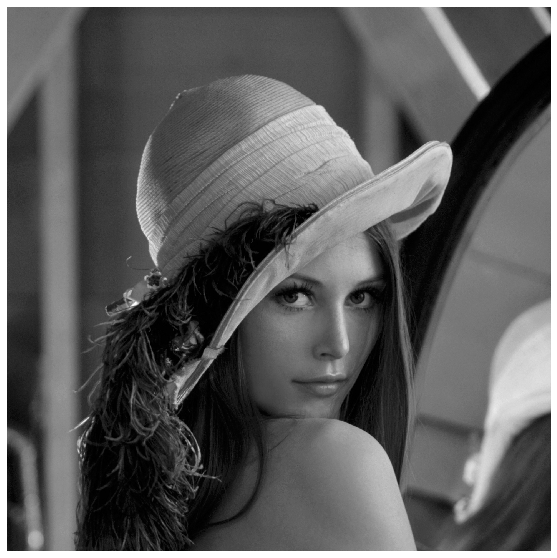

0.4477427450980392


In [18]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(img_alt)
img_info(gray)


img_show(gray, cmap='gray', vmin=0, vmax=1)

print(gray[0,0])

Vediamo come fare la conversione opposta: come possiamo passare da scale di grigio a colore?

Creando i canali aggiuntivi!

(1960, 1960, 3) float64 <class 'numpy.ndarray'>


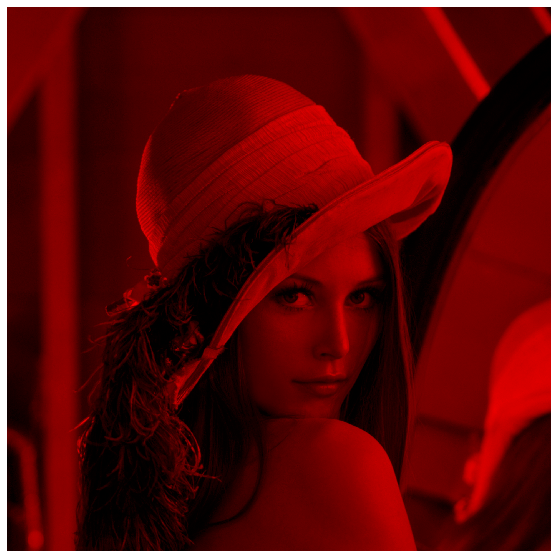

[0.44774275 0.         0.        ]


In [19]:
dim = np.zeros((gray.shape[0],gray.shape[1]))

gray_to_rgb = np.stack((gray,dim,dim),axis=2)

img_info(gray_to_rgb)


img_show(gray_to_rgb, cmap='gray', vmin=0, vmax=1)

print(gray_to_rgb[0,0])

Abbiamo usato solo il canale `R`, ma in effetti possiamo fare varie combinazioni:

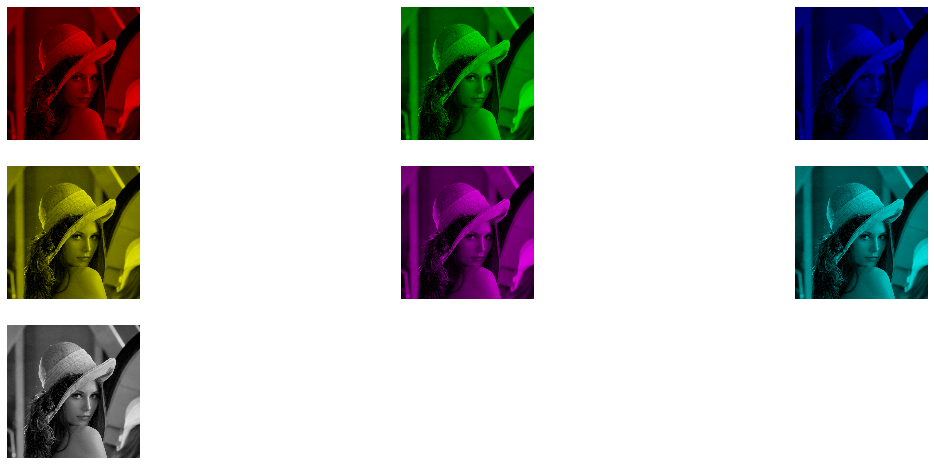

In [20]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(7, 3, 1) 
plt.imshow(np.stack((gray,dim,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 2) 
plt.imshow(np.stack((dim,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 3) 
plt.imshow(np.stack((dim,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 4) 
plt.imshow(np.stack((gray,gray,dim),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 5) 
plt.imshow(np.stack((gray,dim,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 6) 
plt.imshow(np.stack((dim,gray,gray),axis=2))
plt.axis('off')

fig.add_subplot(7, 3, 7) 
plt.imshow(np.stack((gray,gray,gray),axis=2))
plt.axis('off')

plt.show()


Vediamo come fare la conversione opposta: come possiamo passare da scale di grigio a colore?

Creando i canali aggiuntivi!

## Trasformazioni di base

Riprendiamo l'immagine iniziale e proviamo a vedere che effetti hanno sull'immagine alcune semplici operazioni matriciali. 


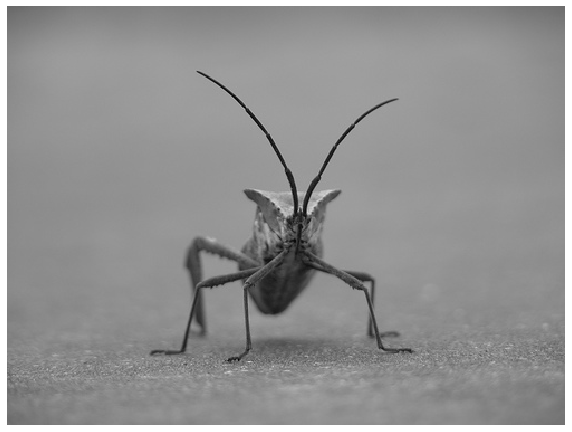

In [71]:

image = mp_image.imread(os.path.join(img_src,'stinkbug.png'))

img_show(image)

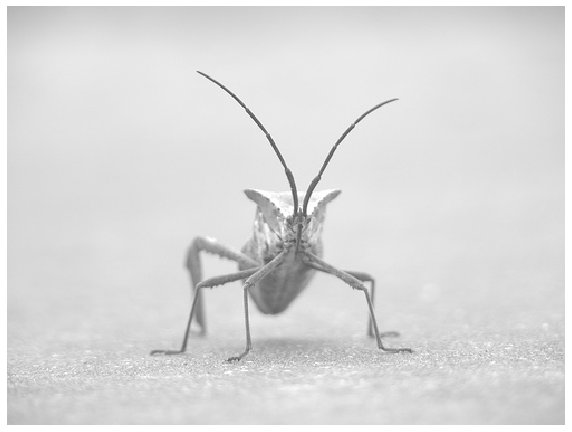

In [72]:
def change_brightness(img,gamma):
    return np.clip(img + gamma, 0,1)
    
image1 = change_brightness(image,0.3)

img_show(image1)

Si noti com'è fatta la funzione: aumentiamo un valore costante ad ogni pixel e tagliamo i valori fuori range. Ovviamente, se aumentiamo troppo l'immagine si satura

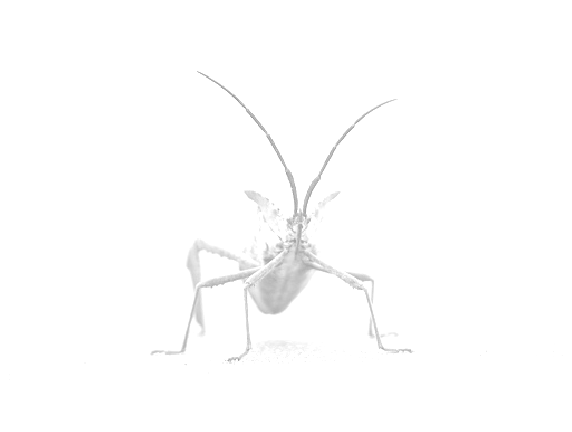

In [73]:
img_show(change_brightness(image,0.6))

possiamo anche scurire l'immagine: 

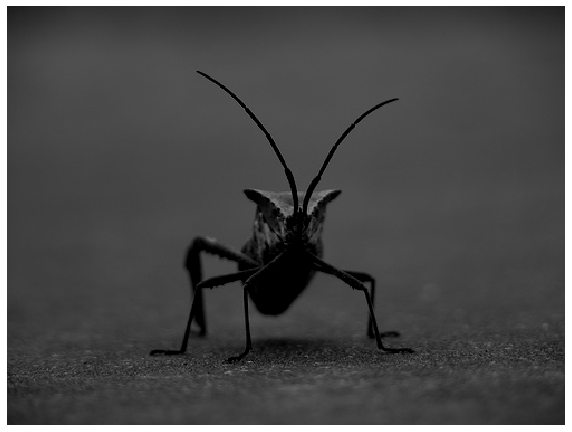

In [74]:
img_show(change_brightness(image,-0.3))

tutte e tre le immagini a confronto:

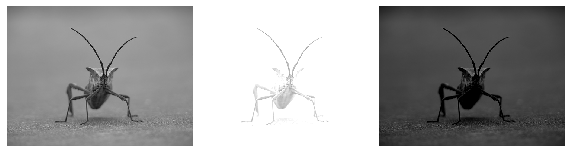

In [75]:
img_show(np.concatenate([image,change_brightness(image,0.6),change_brightness(image,-0.3)],axis=1))

Il contrasto di un'immagine è il range che esiste tra il valore minimo e il valore massimo. Nel caso della figura in esame, 

In [383]:
def get_contrast(img):
    return np.max(img*255) - np.min(img*255)

def base_stats(img):
    print("Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})"
      .format(get_contrast(img),np.max(img*255),np.min(img*255)))



Nella stampa di sopra abbiamo mostrato il contrasto in una scala di 8 bit, sebbene l'operazione sia effettuata sui float per motivi di praticità.



In [384]:
base_stats(image)

Contrasto: 217 (valore massimo: 217; valore minimo: 0)


Come possiamo fare ad manipolare il contrasto? 

Poiché bisogna modificare le distanze, un'operazione moltiplicativa dovrebbe risolvere il problema. 

Contrasto: 108 (valore massimo: 108; valore minimo: 0)


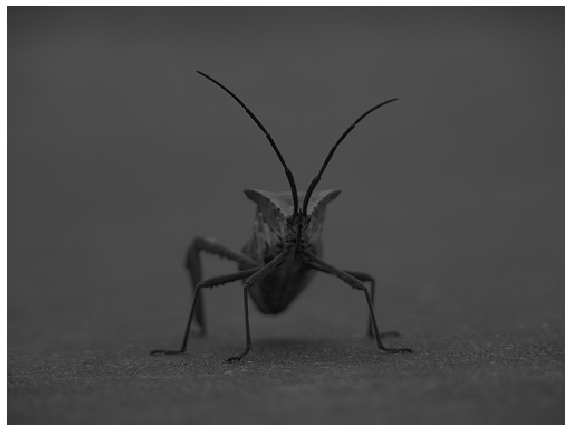

In [385]:
def change_contrast_lin(img,beta):
    return np.clip(img * beta, 0,1)

image1 = change_contrast_lin(image,.5)

base_stats(image1)
img_show(image1)

Contrasto: 255 (valore massimo: 255; valore minimo: 0)


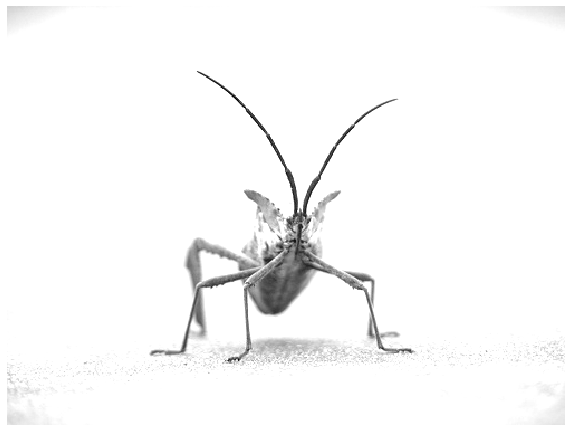

In [386]:
image1 = change_contrast_lin(image,2)

base_stats(image1)
img_show(image1)

La trasformazione di cui sopra è lineare. In realtà va bene una qualsiasi funzione di trasformazione. Per esempio, possiamo applicare l'equazione

$$s = r^\gamma$$

su un range $[r_m, r_M]$ e rimapparlo su un range $[s_{m}, s_M]$. 

In [389]:
def change_contrast_poly(img, gamma=1,rmin=0,rmax=1,smin=0,smax=1):
    img_cl = np.clip(img,rmin,rmax)
    return np.clip((smax-smin)*((img_cl-rmin)/(rmax-rmin))**gamma + smin,0,1)



Contrasto: 255 (valore massimo: 255; valore minimo: 0)


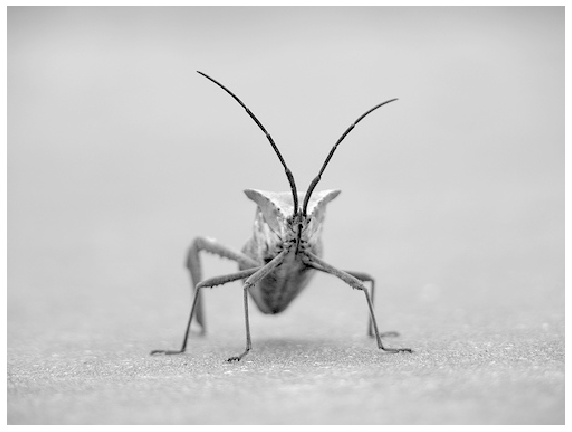

In [390]:
image1 = change_contrast_poly(image,gamma=0.5,rmin=0.1,rmax=0.8)

base_stats(image1)
img_show(image1)


Contrasto: 102 (valore massimo: 128; valore minimo: 26)


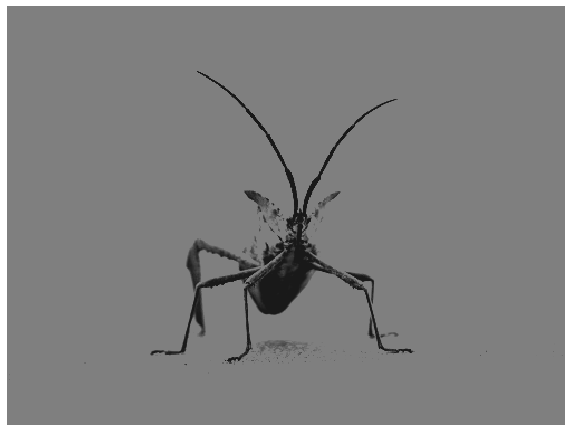

In [391]:
image2 = change_contrast_poly(image,gamma=1.3,rmin=0.2, rmax=0.4, smin=0.1,smax = 0.5)

base_stats(image2)
img_show(image2)


## Istogramma

vediamo come possiamo costruire un istogramma e plottarlo 

In [392]:
def plot_hist_fast(img):
    vals = (img*255).mean(axis=2).flatten()

    fig = plt.figure(figsize=(20,10))
    # plot histogram with 255 bins
    plt.subplot(1,2,1)
    plt.hist(vals, 256, fc='k', ec='k')
    plt.xlim([0,255])
    plt.subplot(1,2,2)
    plt.hist(vals, 256, ec='k',cumulative=True, density= True)
    plt.xlim([0,255])
    
    plt.show()



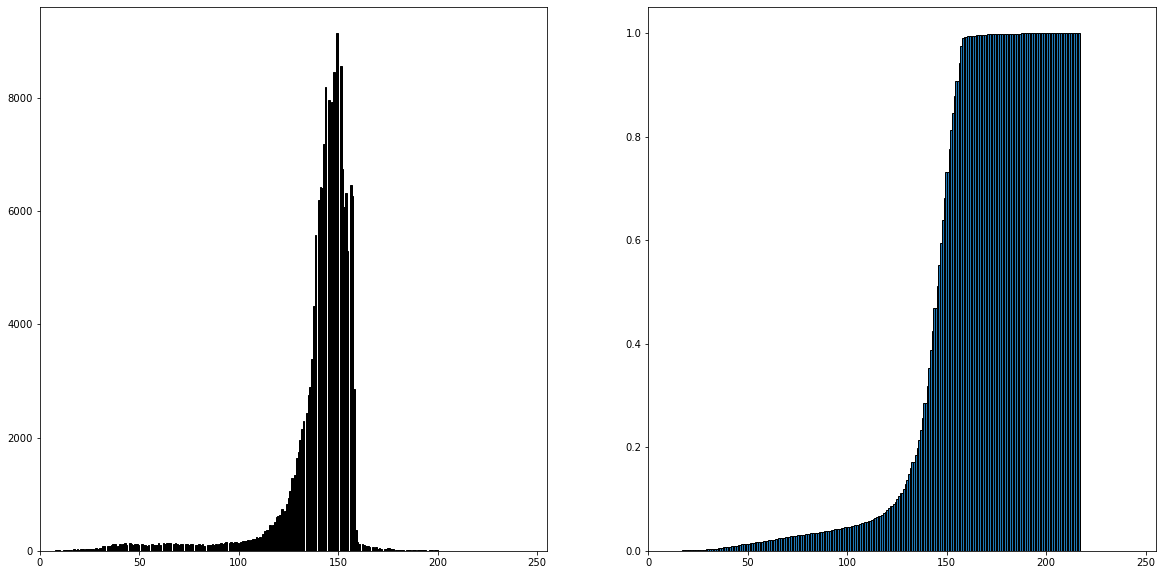

In [368]:
plot_hist_fast(image)

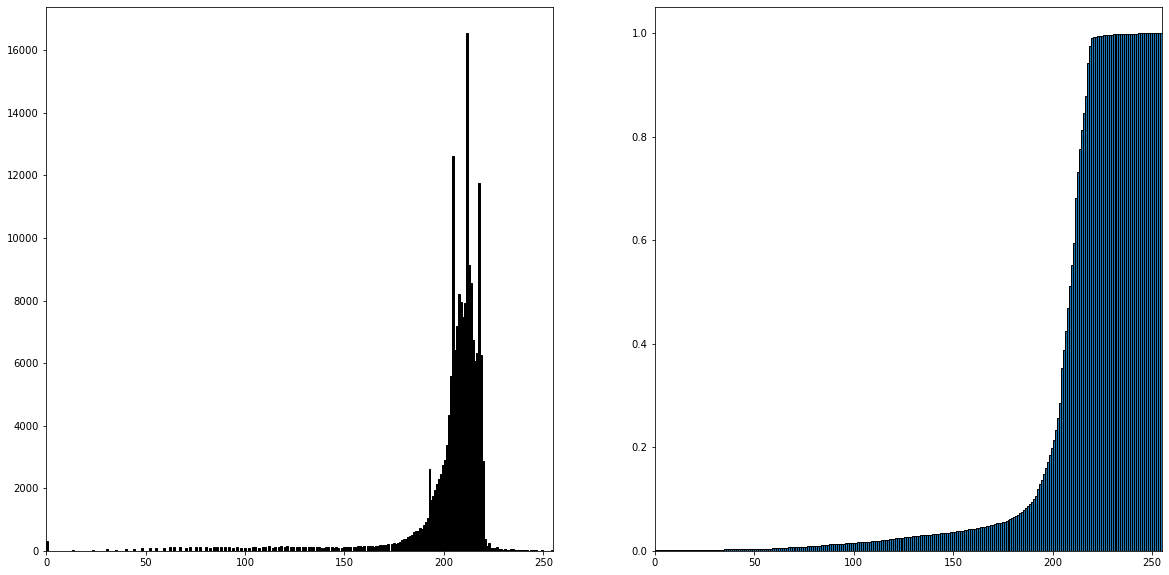

In [369]:
plot_hist_fast(image1)

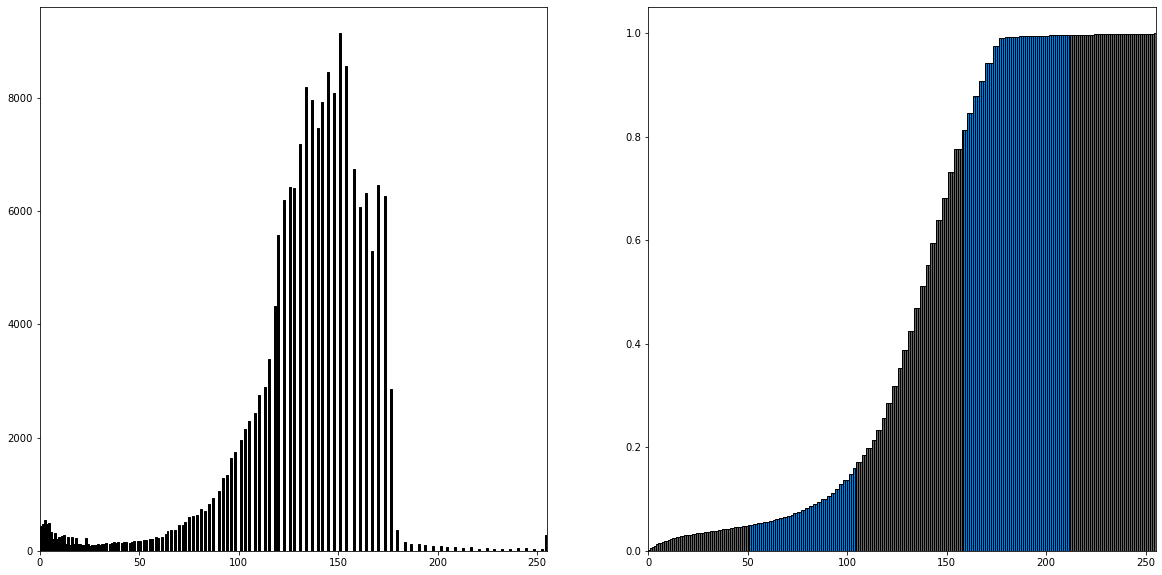

In [370]:
plot_hist_fast(image2)

### Esercizio:

se volessimo bilanciare l'istogramma, che tipo di trasformazione dovremmo fare?

*Suggerimento:* Analizziamo il grafico di sotto. Cosa ci serve fare?

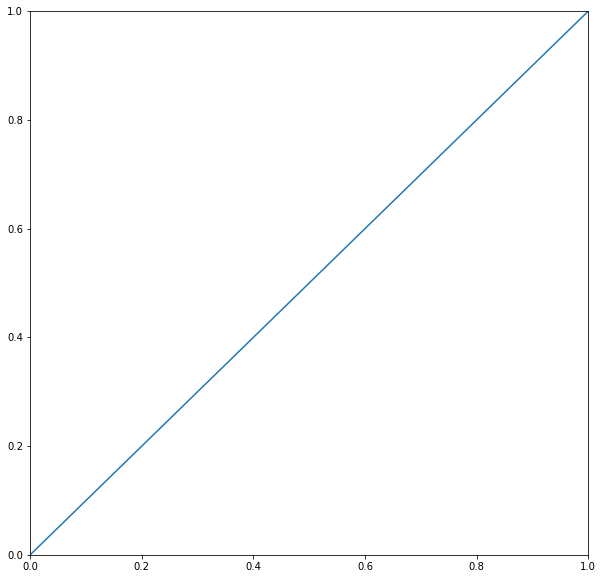

In [393]:
### Suggerimento: 



x = np.linspace(0,1,1000)


x_cl = np.clip(x,xmin,xmax)



xmin = 0

xmax = 1

ymin = 0
ymax = 1

gamma = 1


y = np.clip((ymax-ymin)*((x_cl-xmin)/(xmax-xmin))**gamma + ymin,ymin,ymax)



plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlim([0,1])
plt.ylim([0,1])


plt.show()




In [371]:
## Modelliamo la risposta


#image3 = change_contrast_poly(image,gamma=6,rmin=0.1,rmax=0.6,smin=0,smax=1)

# base_stats(image3)
# img_show(image3)



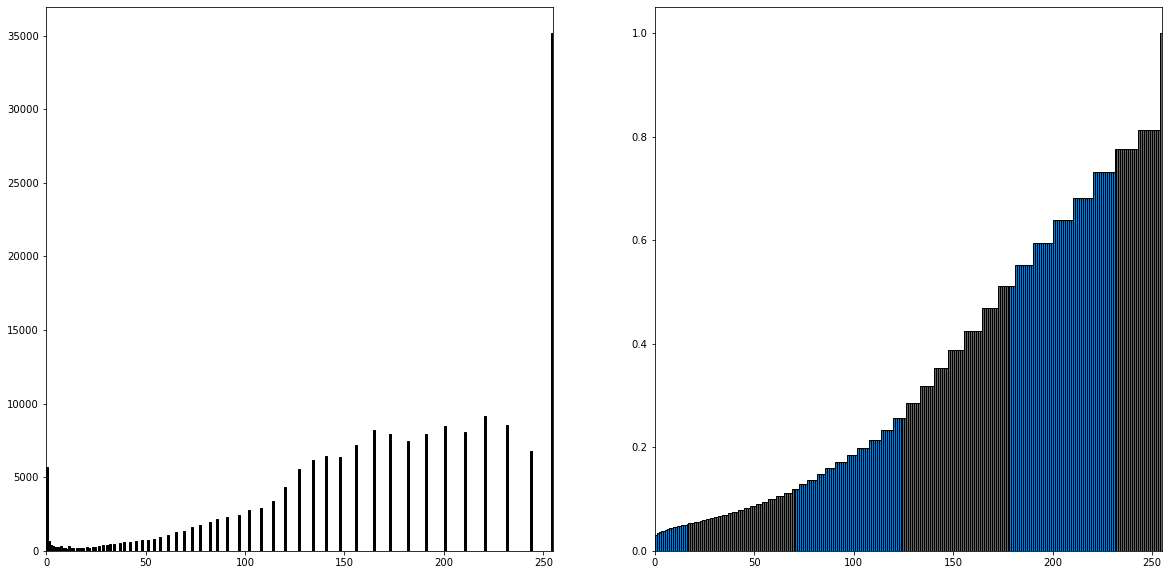

In [372]:
plot_hist_fast(image3)

Proviamo ad equalizzare l'istogramma

In [374]:
def image_histogram_equalization(image, number_bins=256):
    
    n_of_channels = image.shape[2]
    
    image_equalized = np.zeros(image.shape)
    
    for i in range(n_of_channels):
        
        # get image histogram
        image_histogram, bins = np.histogram(image[:,:,i].flatten(), number_bins, density=True)
        cdf = image_histogram.cumsum() # cumulative distribution function
        cdf = cdf / cdf[-1] # normalize

        # use linear interpolation of cdf to find new pixel values
        channel_equalized = np.interp(image[:,:,i].flatten(), bins[:-1], cdf)
        channel_equalized = channel_equalized.reshape(image[:,:,i].shape)
        
        image_equalized[:,:,i] = channel_equalized

    return image_equalized

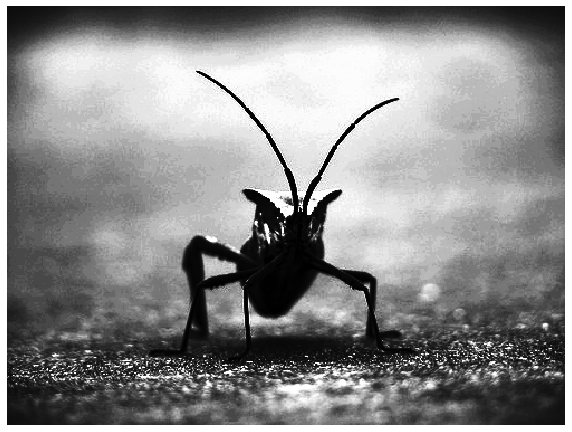

In [375]:
image4 = image_histogram_equalization(image)


img_show(image4)

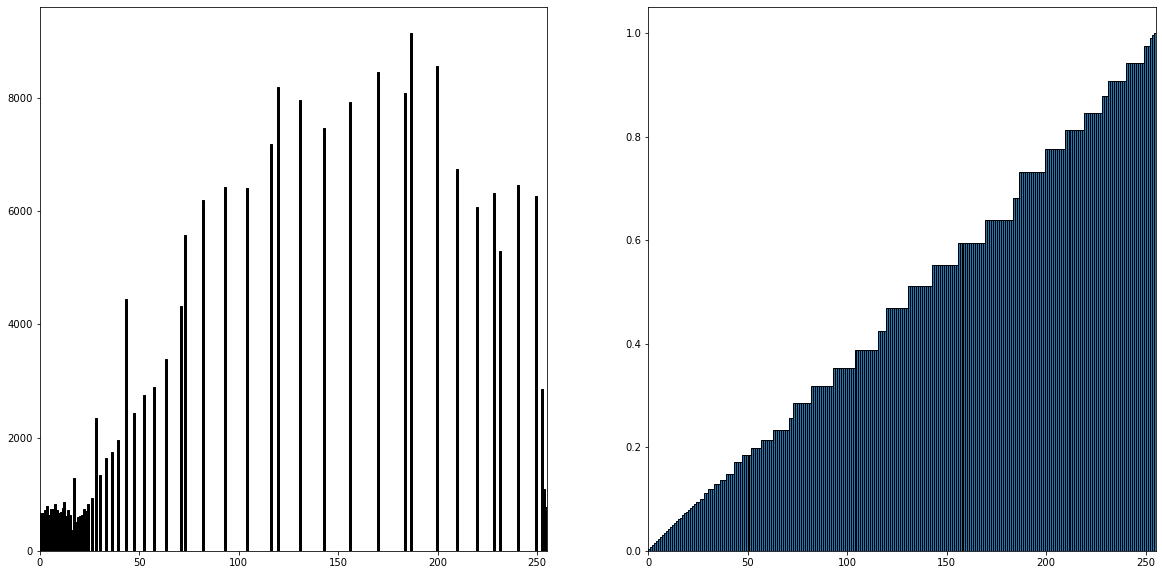

In [376]:
plot_hist_fast(image4)